# 確率ロボティクス課題

## 問題
学生Cは自動走行ロボットのソフトウェアを改良した。改良したソフトウェアの性能を評価するため、改良前と改良後のソフトウェアでロボットをそれぞれ5回走らせて結果を比較した。ロボットの走行結果は以下の表のようになる。

| 走行実験 | 改良前 | 改良後 |
| --- | --- | --- |
| 1回目 |　完走 | 完走 |
| 2回目 |　失敗 | 完走 |
| 3回目 |　失敗 | 完走 |
| 4回目 |　完走 | 完走 |
| 5回目 |　完走 | 完走 |

学生Cが行った実験の結果に基づき、ベイズ統計でソフトウェアの改良前後の完走率を評価せよ。

## 確率分布で完走率を調査

### 信頼できる実験結果

学生Cは改良したソフトウェアの性能を評価するために、走行実験を行った。改良後の完走回数が改良前より多ければソフトウェアの性能がよくなったと判断できるだろう。しかし、信頼できる統計結果を調査するため、数万回以上の実験を行う必要がある。学生Cが行った実験回数はわずか5回だったため、改良後の完走率を調査するには不十分である。実験回数を増やすと、信頼できる結果に近づく事はできるが数万回の試行回数はさすがにコストが高いので、現実的な方法とは言えない。そこでベイズ統計を用いて`完走率がどの値になるかの確率`という`確率の確率`を考える事で、数万回実験しなくても信頼できる完走率を調べる事ができる。

### 試行後の完走率の確率の計算式

完走率を$t$、実験後の走行結果を$a$(完走か失敗)とする。したがって、完走率の確率を$p(t)$、$p(t)$は1回の実験ごとに結果$a$によって変化するため、完走率の確は$p(t)$から$p(t|a)$に変化する。ここで、確率の乗法定理を用いて以下の式が成り立つ。

$$
p(t,a) = p(t|a)p(a)
$$
$$
p(t,a) = p(a|t)p(t)
$$

上記の2つの公式の右辺から、以下のベイズの定理の公式を導く事ができる。

$$
p(t|a) = \frac{p(a|t)p(t)}{p(a)}
$$

$t$は完走率、$a$は$t$という規則があるときの走行の結果なので

$$
    p(t|a) =
        \begin{cases}
            t \quad (a:完走) \\
            1-t \quad (a:失敗) \\
        \end{cases}
$$

$\eta = 1/p(a)$とすると

$$
p(t|a) = \eta p(a|t)p(t)
$$

ここで、
- $p(t)$は$a$の結果がわかる前の完走率の確率
- $p(t|a)$は$a$の結果がわかった後の完走率の確率
- $p(a|t)$は完走率$t$があると時に$a$の起こる確率
- $\eta$は$p(t|a)p(t)$の規格化定数

また、$p(t)$は実験結果$a$に基づいて$p(t|a)$に変化するため、実験回数を$i$と置くと以下の式が得られる。

$$
p(t|a_{1:i+1}) = \eta p(a_{i+1}|t)p(t|a_{1:i})
$$

以上、完走率の計算式を導入した。

### 学生Cの実験で完走率を評価

完走率$t$と完走率の確率$p(t)$は確率なので、離散型の数字で近似して表す事ができる。

$$
t = 0.00,0.01,0.02,...,1.00 \\
$$
$$
p(t) = 0.00,0.01,0.02,...,1.00
$$

また、1回目の実験結果$a_1$がわかる前、$t$が上記の101個の値である確率全部同じであると仮説できる。

$$
p(t) = 1/101 \quad (t = 0.00,0.01,0.02,...,1.00)
$$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure(1)
val_num = 101
val_list = [i/100.0 for i in range(val_num)]
print(val_list)

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0]


<Figure size 640x480 with 0 Axes>

In [2]:
p_t_0 = np.array([1/val_num for i in range(val_num)])
print(p_t_0)

[0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099
 0.00990099 0.00990099 0.00990099 0.00990099 0.00990099 0.0099

$p(a|t)$の実装

In [3]:
def likelihood(result):
    if result:
        return np.array([1/val_num * i for i in range(val_num)])
    else:
        return np.array([1 - (1/val_num * i) for i in range(val_num)])

規格化定数$\eta$の実装

In [4]:
def normalize(post_dist):
    return post_dist/np.sum(post_dist)

学生Cの実験結果は以下の表のようになるため

| 走行実験 | 改良前 | 改良後 |
| --- | --- | --- |
| 1回目 |　完走 | 完走 |
| 2回目 |　失敗 | 完走 |
| 3回目 |　失敗 | 完走 |
| 4回目 |　完走 | 完走 |
| 5回目 |　完走 | 完走 |

In [5]:
result_before = [1,0,0,1,1]
result_after = [1,1,1,1,1]

$p(t|a_{1:i+1}) = \eta p(a_{i+1}|t)p(t|a_{1:i})$の実装

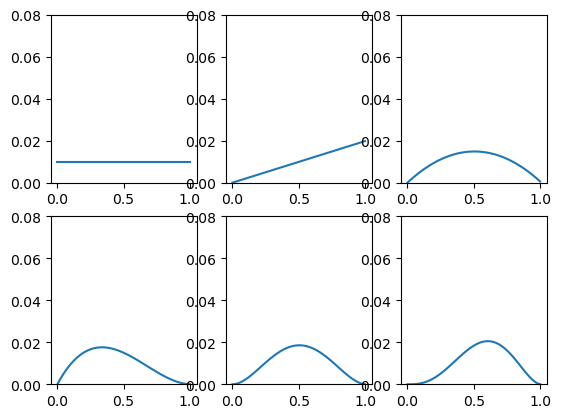

In [6]:
# 確率分布の変化リスト
post_dist_before = [np.copy(p_t_0)]
post_dist_after = [np.copy(p_t_0)]

p_t = np.copy(p_t_0)
# 改良前の評価
for r in result_before:
    dist = p_t * likelihood(r)
    p_t = normalize(dist)
    post_dist_before.append(np.copy(p_t))

for i, dist in enumerate(post_dist_before):
    plt.subplot(231+i)
    ax = plt.gca()
    ax.set_ylim([0, 0.08])
    ax.plot(val_list, dist)

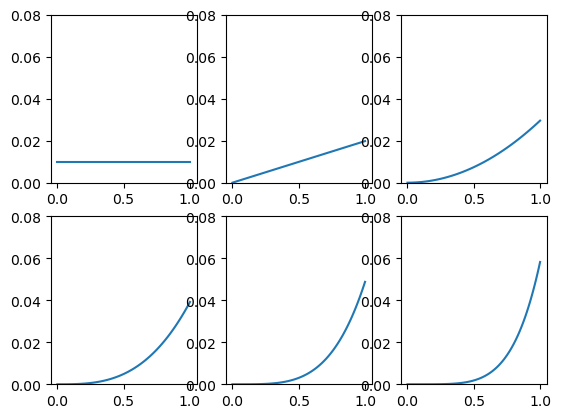

In [7]:
p_t = np.copy(p_t_0)
# 改良後の評価
for r in result_after:
    dist = p_t * likelihood(r)
    p_t = normalize(dist)
    post_dist_after.append(np.copy(p_t))

for i, dist in enumerate(post_dist_after):
    plt.subplot(231+i)
    ax = plt.gca()
    ax.set_ylim([0, 0.08])
    ax.plot(val_list, dist)

### まとめ

以上、ベイズ統計用いて学生Cが改良したソフトウェアの改良前と改良後の完走率がどう変化するのかを評価した。学生Cが行った実験回数はまだまだ足りないが、改良前と比べて改良後の完走率の方が高い傾向がある。より信頼できる完走率を獲るためには、実験回数を増やし、完走率の確率分布の平均値と分散がほとんど変化しなくなった所で、実験データから改良前と改良後の完走率の変化傾向を以下の例のように解説できるだろう。

## 未知の完走率の調査例

例:あるロボットの完走率を調査した時、100回目の実験で完走率の分布が60%の所に集中した。また、実験回数を増やした所で、完走率の完走率分布の平均値と分布値がほとんど変化しなかったため、実験データから完走率が60%にある所に集中したと結論できる。

In [8]:
import random

robot_result = [1 for i in range(600)]
robot_result += [0 for i in range(400)]

random.shuffle(robot_result)

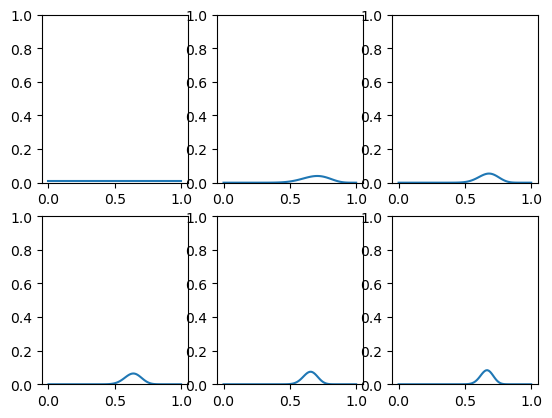

In [14]:
robot_post_dist = [np.copy(p_t_0)]
p_t = np.copy(p_t_0)

# 完走率の調査
for r in robot_result:
    dist = p_t * likelihood(r)
    p_t = normalize(dist)
    robot_post_dist.append(np.copy(p_t))

# 100回の実験のデータ
for i in range(6):
    plt.subplot(231+i)
    ax = plt.gca()
    ax.set_ylim([0, 1.0])
    ax.plot(val_list, robot_post_dist[(i*20)])

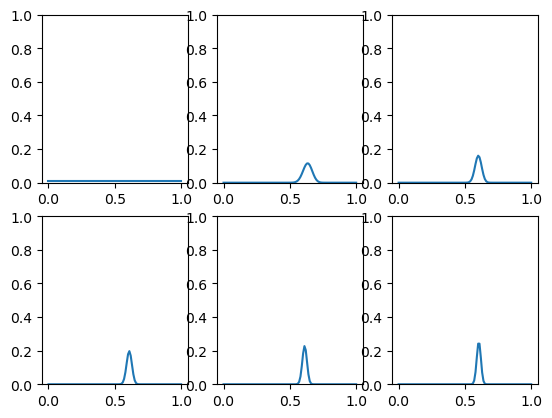

In [15]:
# 1000回の実験のデータ
for i in range(6):
    plt.subplot(231+i)
    ax = plt.gca()
    ax.set_ylim([0, 1.0])
    ax.plot(val_list, robot_post_dist[(i*199)])